In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton/belo tiru/exported_merged_power_consum.csv")
df.head()

,Unnamed: 0,Timestamp,power x h,H_sun,temp,wind_speed
0,0,2018-06-12 14:01:00,32454.375000,48.03,24.49,4.00
1,1,2018-06-12 15:01:00,19558.733333,37.10,23.40,3.38
2,2,2018-06-12 16:01:00,17365.166667,26.11,22.87,3.24
3,3,2018-06-12 17:01:00,13120.900000,15.36,22.18,2.34
4,4,2018-06-12 18:01:00,12720.100000,5.16,21.27,2.07


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Remove irrelevant columns
df = df.drop(columns=['Timestamp'])

# Handle missing values by filling with zeros
df = df.fillna(0)

# Split into features (X) and target (y)
X = df.drop(columns=['power x h']).values  # Input features
y = df[['power x h']].values  # Desired output

140/140 [==============================] - 2s 4ms/step
Epoch 1 - R2: -8.6117, MAE: 71635.6107, MSE: 5727552201.3166
140/140 [==============================] - 1s 4ms/step
Epoch 2 - R2: -8.6046, MAE: 71605.7482, MSE: 5723274678.4355
140/140 [==============================] - 0s 3ms/step
Epoch 3 - R2: -8.5975, MAE: 71576.2544, MSE: 5719051592.3404
140/140 [==============================] - 1s 4ms/step
Epoch 4 - R2: -8.5904, MAE: 71546.9932, MSE: 5714863557.8954
140/140 [==============================] - 0s 3ms/step
Epoch 5 - R2: -8.5834, MAE: 71517.8271, MSE: 5710690866.7539
140/140 [==============================] - 1s 5ms/step
Epoch 6 - R2: -8.5765, MAE: 71488.7219, MSE: 5706528613.5543
140/140 [==============================] - 0s 3ms/step
Epoch 7 - R2: -8.5695, MAE: 71459.6699, MSE: 5702375657.3691
140/140 [==============================] - 1s 5ms/step
Epoch 8 - R2: -8.5625, MAE: 71430.6096, MSE: 5698223218.8216
140/140 [==============================] - 0s 3ms/step
Epoch 9 - R2: -8.

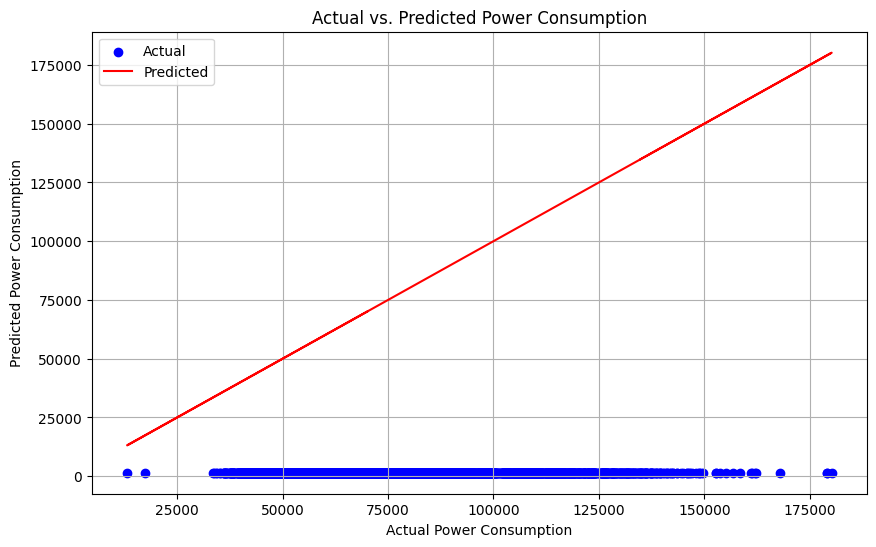

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton/belo tiru/exported_merged_power_consum.csv")

# Remove irrelevant columns
df = df.drop(columns=['Timestamp'])

# Handle missing values by filling with zeros
df = df.fillna(0)

# Split into features (X) and target (y)
X = df.drop(columns=['power x h']).values  # Input features
y = df[['power x h']].values  # Desired output

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define data dimensions
numero_di_istanti_temporali = X_train.shape[0]
numero_di_caratteristiche = X_train.shape[1]

# Reshape the input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Add a dimension
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape test data

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(numero_di_caratteristiche, 1)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)  # One output node for 'power x h'
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

# Create lists to store evaluation metrics
r2_scores = []
mae_scores = []
mse_scores = []

# Training the model
for epoch in range(50):
    model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate on the test set
    y_pred = model.predict(X_test_reshaped)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)

    print(f'Epoch {epoch + 1} - R2: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}')

# Print the final evaluation metrics
final_loss = model.evaluate(X_test_reshaped, y_test)
print("Final Test loss:", final_loss)
print("Mean R2:", np.mean(r2_scores))
print("Mean MAE:", np.mean(mae_scores))
print("Mean MSE:", np.mean(mse_scores))

# Generate and display plots of actual vs. predicted outputs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual')
plt.plot(y_test, y_test, color='red', label='Predicted')
plt.title('Actual vs. Predicted Power Consumption')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Specify the directory for exporting the model to SavedModel format
export_dir = '/content/drive/MyDrive/Colab Notebooks/Hackaton/d2part3'

# Export the model to SavedModel format in the specified directory
tf.saved_model.save(model, export_dir)